## Thermal remote sensing assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Spectral emissivity

In [ ]:
# Import the data
fine_snow = np.loadtxt('Data/fine_snow.txt', skiprows=22)
coarse_snow = np.loadtxt('Data/coarse_snow.txt', skiprows=22)
ice =np.loadtxt('Data/ice.txt', skiprows=22) 
rock = np.loadtxt('Data/purple_banded_sandstone.txt', skiprows=22)
sea_water = np.loadtxt('Data/sea_water.txt', skiprows=22)
soil = np.loadtxt('Data/dark_reddish_brown_sandy_loam.txt', skiprows=22)
tap_water = np.loadtxt('Data/tap_water.txt', skiprows=22)
trees = np.loadtxt('Data/chorisia_insignis_(its_a_tree).txt', skiprows=22)

In [ ]:
# Define equation 
def blackbody(T,wavelength):
    c=2.9979*10**8 #[m/s]
    k=1.38*10**(-23) #[Ws/K]
    h=6.626*10**(-34) #[W sec^2]

    #convert wavelength to meters
    wavelength=wavelength*10**(-6)

    S=((2*np.pi*h*c**2)/(wavelength**5))*(1/(np.exp(c*h/(wavelength*k*T))-1))
    
    return S

def spectral_emitance(S_prime,T,wavelength):
    black_body_S = blackbody(T,wavelength)
    emissivity = S_prime/black_body_S
    return(emissivity)

def radiant_temperature(T_surface,wavelength):
    S=blackbody(T_surface,wavelength)
    steph_blotz = 5.669*10**(-8) #[W/(m^2 K^4)]
    rad_T=(S/steph_blotz)**(1/4)

    print('Gotta luv MUDE')

    return(rad_T)

Spectral emissivity ice vs sea water

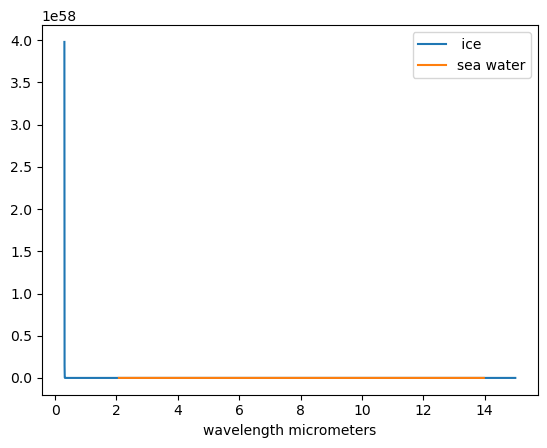

In [ ]:
# For ice, the temperature is 273.15K
S_ice,S=emissivity(273.15,ice[:,0],ice[:,1])

# For sea water, the temperature is 275.15 K


#Plotting
plt.figure()
plt.plot(ice[:, 0],S_ice , label=' ice')
plt.plot(sea_water[:,0], S_sea_water, label= 'sea water')

#plt.ylim(0.90,10)
plt.xlabel('wavelength micrometers')
plt.legend()
plt.show()

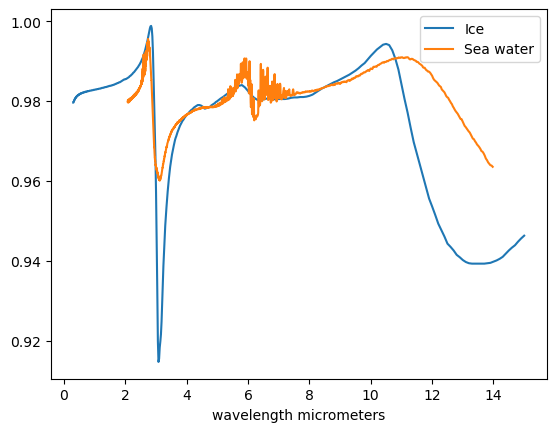

In [73]:
plt.plot(ice[:, 0],1-ice[:, 1]/100 , label='Ice')
plt.plot(sea_water[:, 0],1-sea_water[:, 1]/100 , label='Sea water')

#plt.ylim(0.90,10)
plt.xlabel('wavelength micrometers')
plt.legend()
plt.show()

### 2. Thermal remote sensing for identifying sea ice